In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

import os
os.getcwd()


'C:\\Users\\DELL\\My CA2 FINAL'

In [8]:
df = pd.read_csv(r"C:\\Users\\DELL\\My CA2 FINAL\\AirQualityUCI.csv")
df.head()
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
missing = (df.isnull().sum()*100)
print(missing)

Date              11400
Time              11400
CO(GT)            11400
PT08.S1(CO)       11400
NMHC(GT)          11400
C6H6(GT)          11400
PT08.S2(NMHC)     11400
NOx(GT)           11400
PT08.S3(NOx)      11400
NO2(GT)           11400
PT08.S4(NO2)      11400
PT08.S5(O3)       11400
T                 11400
RH                11400
AH                11400
Unnamed: 15      947100
Unnamed: 16      947100
dtype: int64


In [10]:
df = df.drop(["Unnamed: 15"], axis=1)
df = df.drop(["Unnamed: 16"], axis=1)
df = df.drop(["Time"],axis=1)
df = df.drop(["Date"], axis=1)


In [11]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [12]:
df = df.dropna(subset=["NOx(GT)"])

#Convert all categorical columns to numeric
df = pd.get_dummies(df, drop_first=True)

y = df["NOx(GT)"]
X = df.drop("NOx(GT)", axis=1)



In [13]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.1736111111111111


In [16]:
from sklearn.metrics import confusion_matrix, classification_report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))




Confusion Matrix:
[[309   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   1   0]]


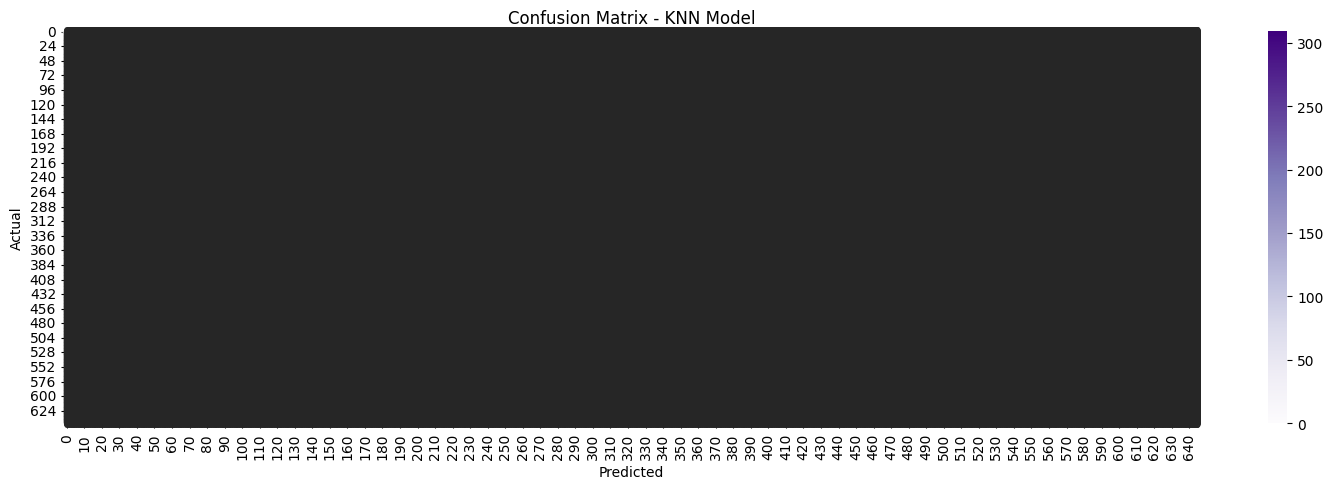

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Purples')


plt.title("Confusion Matrix - KNN Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout() 
plt.show(block=True)

In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

RMSE: 90.73820589226463
R² Score: 0.8710240535868186


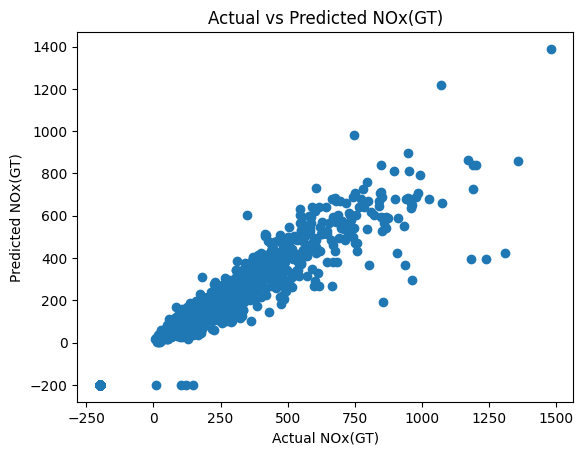

In [21]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual NOx(GT)")
plt.ylabel("Predicted NOx(GT)")
plt.title("Actual vs Predicted NOx(GT)")
plt.show()

In [ ]:
#NOx(GT) is a continuous numeric value, not a category.So you cannot use:

KNeighborsClassifier

Confusion matrix

Accuracy

Classification report

All of these only work for classification problems with discrete classes, not continuous numbers

